In [1]:
import beam as bm

In [2]:
import matplotlib.pyplot as plt

In [3]:
bm.set_operation_mode('fn')

 current OPERATION_MODE='class'
 Set OPERATION_MODE='function'


In [11]:
def single_partition_routine(mkt):
    #-------------------------  metrics
    mkt.add_metric('sigma_scatter', bm.mtr_sct_sigma)            

    #------------------------- run
    mkt.run(365*2)

    #------------------------- visualization
    mkt.show_infograph()

    plt.figure(figsize=(15,4))
    mkt.plot_price()
    plt.show()

    plt.figure(figsize=(15,6))
    bm.plot_sigma_scatter(mkt, show_avg=True)
    plt.show()

    plt.figure(figsize=(15,4))
    bm.plot_sigma_distribution(mkt)
    plt.show()
    
    return mkt

In [12]:
def multi_partition_routine(mkt):
    #-------------------------  metrics
    # general metrics
    mkt.add_metric('sigma_scatter', bm.mtr_sct_sigma)

    # partition-wise metrics
    mkt.add_partition_metric('partition avg sigma', bm.mtr_part_sigma_average)
    mkt.add_partition_metric('partition tot wealth', bm.mtr_part_totwealth)
    mkt.add_partition_metric('partition stock flow', bm.mtr_part_stockflow)
    mkt.add_infograph('partition avg sigma')
    mkt.add_infograph('partition tot wealth')
    mkt.add_infograph('partition stock flow')


    #------------------------- run
    mkt.run(365*2)

    #------------------------- visualization
    mkt.show_infograph()

    # prices
    plt.figure(figsize=(15,4))
    mkt.plot_price()
    plt.show()

    # sigma scatter
    plt.figure(figsize=(15,6))
    mkt.plot_partition_metric('partition avg sigma')
    bm.plot_sigma_scatter(mkt)

    plt.show()

    plt.figure(figsize=(15,4))
    bm.plot_sigma_distribution(mkt)
    plt.show()
    
    return mkt

__Sistema all'equilibrio__


Building partition fixsent of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution


  0%|          | 0/730 [00:00<?, ?it/s]

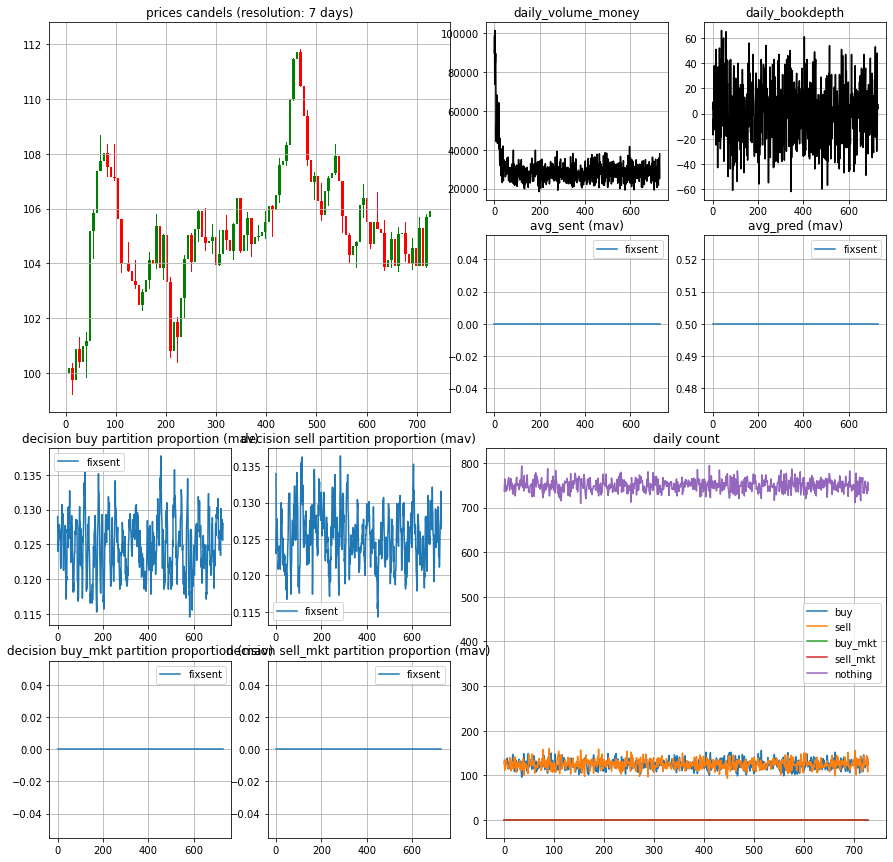

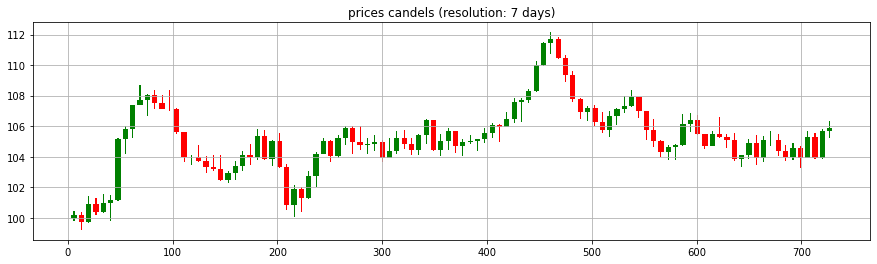

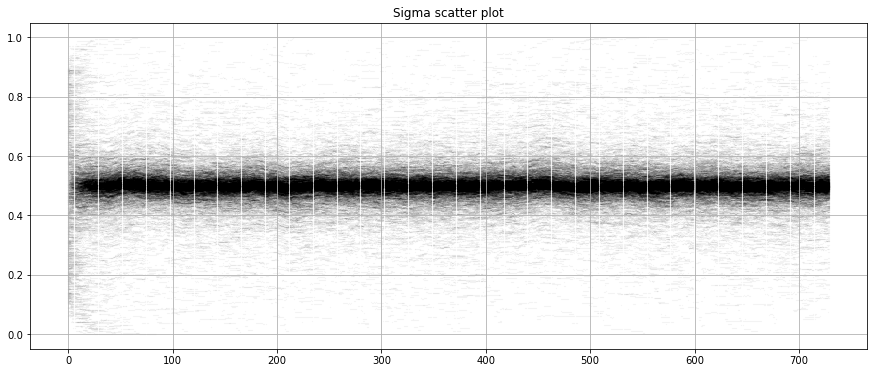

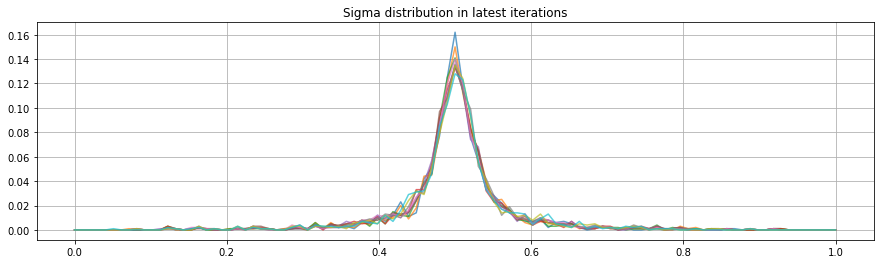

In [6]:
mkt=bm.Market()

SENT_VALUE=0.0
mkt.add_partition(1000, 'fixsent', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment('fixsent', bm.sentiment_start_at_value(SENT_VALUE))

single_partition_routine(mkt)

__Una partizione e più shock del sentiment__


Building partition fixsent of 1000 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5


  0%|          | 0/730 [00:00<?, ?it/s]

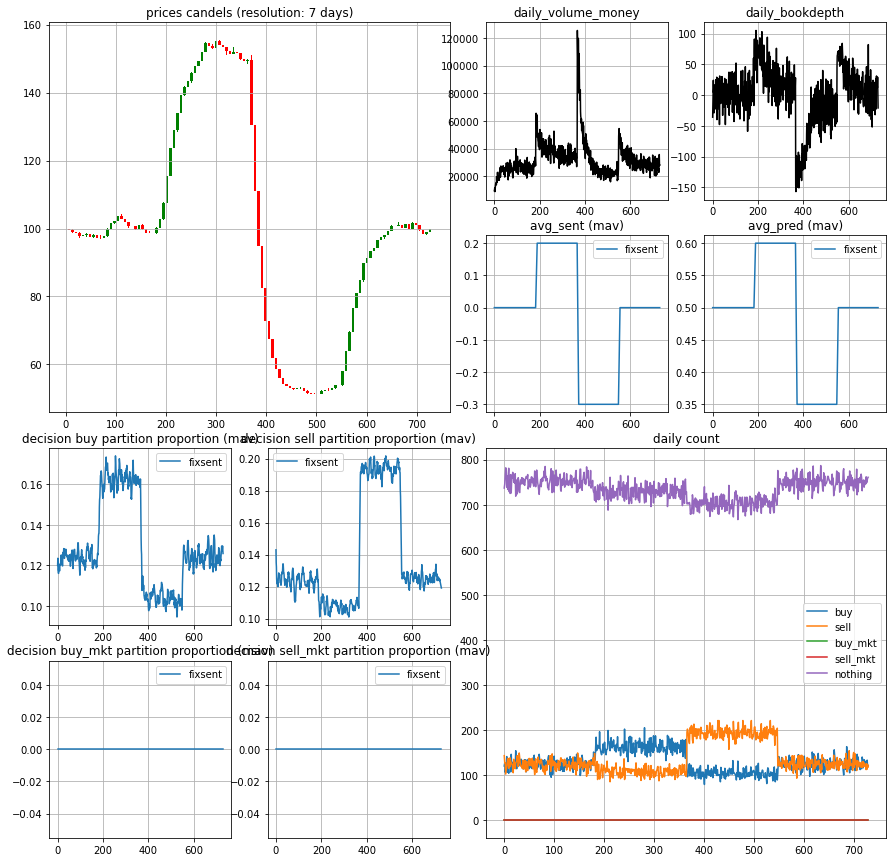

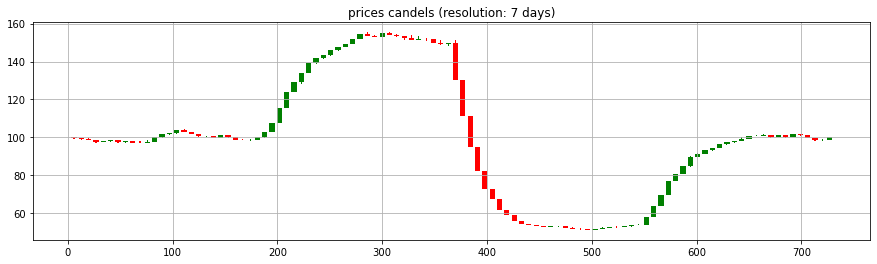

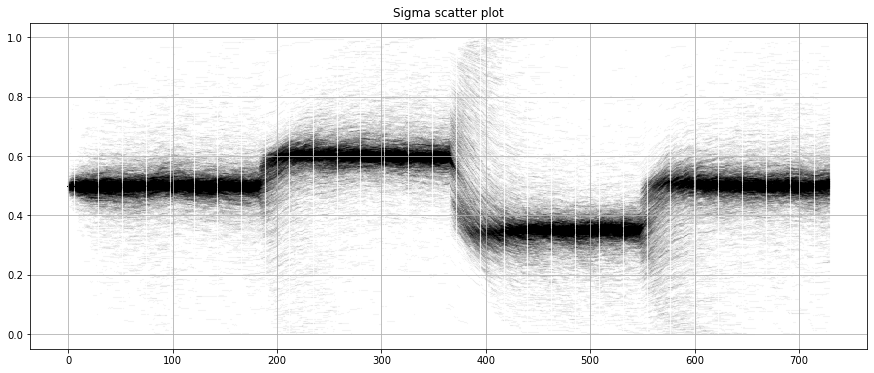

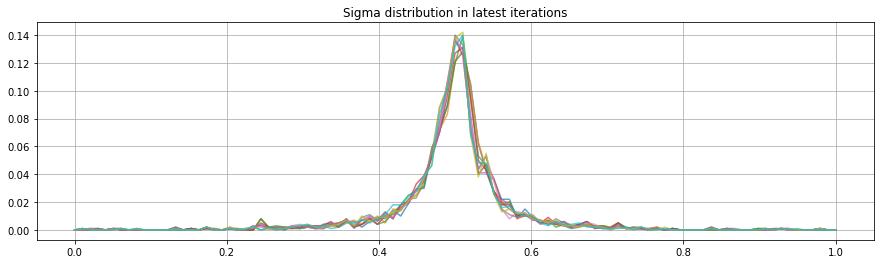

In [7]:
def multi_shock_sentiment(agent, **external):
    time=external['market'].time
    if time>365/2:
        agent.sentiment=0.2
    if time>365:
        agent.sentiment=-0.3
    if time>365/2*3:
        agent.sentiment=0.0
        
mkt=bm.Market()

SENT_VALUE=0.0
mkt.add_partition(1000, 'fixsent')
mkt.set_part_sentiment('fixsent', multi_shock_sentiment)

single_partition_routine(mkt)

__Nella partizione gli agenti hanno distribuzione uniforme di ricchezza e quantità iniziale di stock; sentiment è stagionale + noise__


Building partition seasonal of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution


  0%|          | 0/730 [00:00<?, ?it/s]

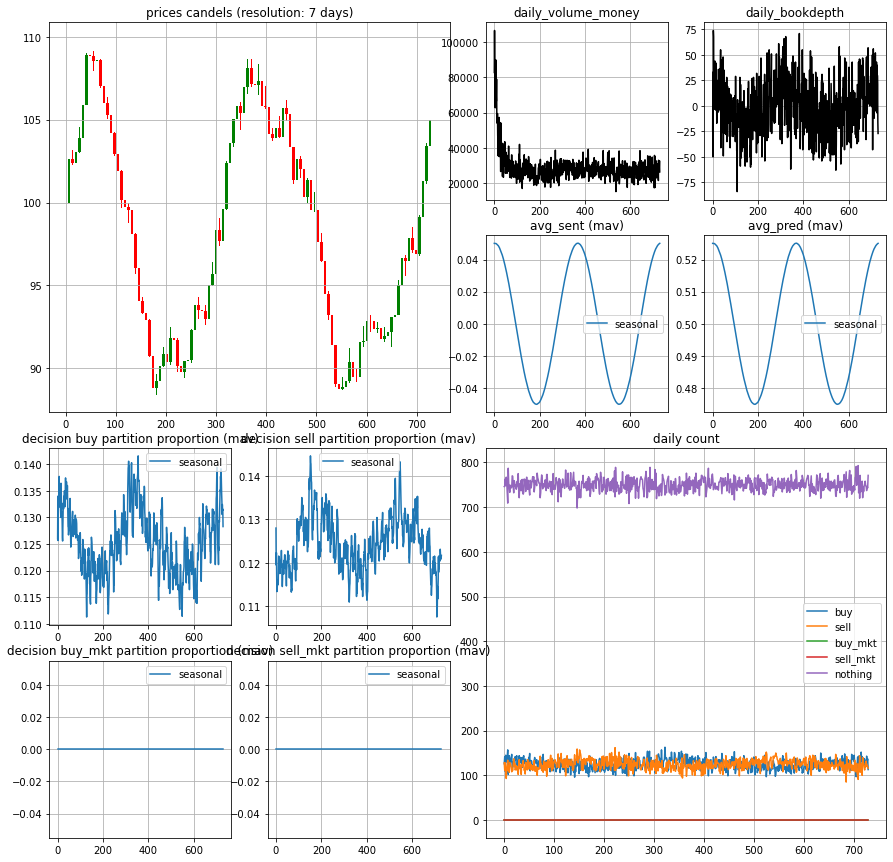

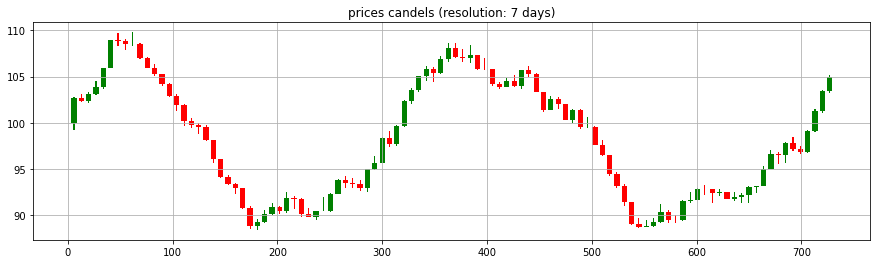

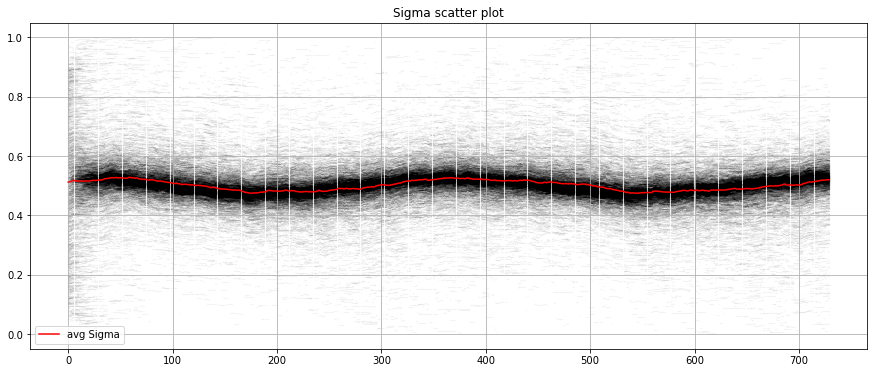

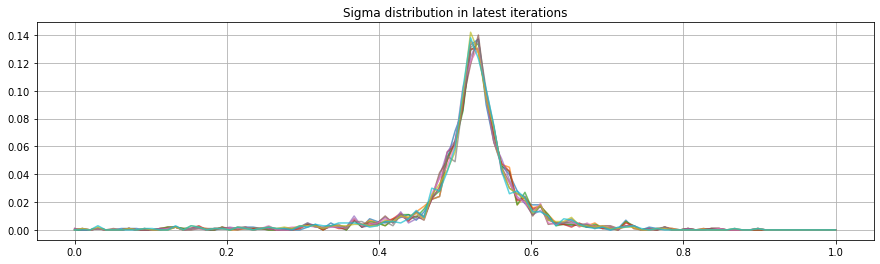

In [8]:
import numpy as np


def periodic_fn(interval):
    return np.cos(interval*2*np.pi)

mkt=bm.Market()
mkt.add_partition(1000, 'seasonal', tot_wealth='uniform', sigma_prop='uniform')
mkt.set_part_sentiment('seasonal', bm.sentiment_periodic(periodic_fn, strenght=0.05, period=365))
mkt.add_part_sentiment('seasonal', bm.sentiment_add_noise(noise_sigma=0.05))

single_partition_routine(mkt)

__Più partizioni con diverso sentiment fisso__


Building partition $partition_1$ of 1000 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5

Building partition $partition_2$ of 1000 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5

Building partition $partition_3$ of 1000 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5


  0%|          | 0/730 [00:00<?, ?it/s]

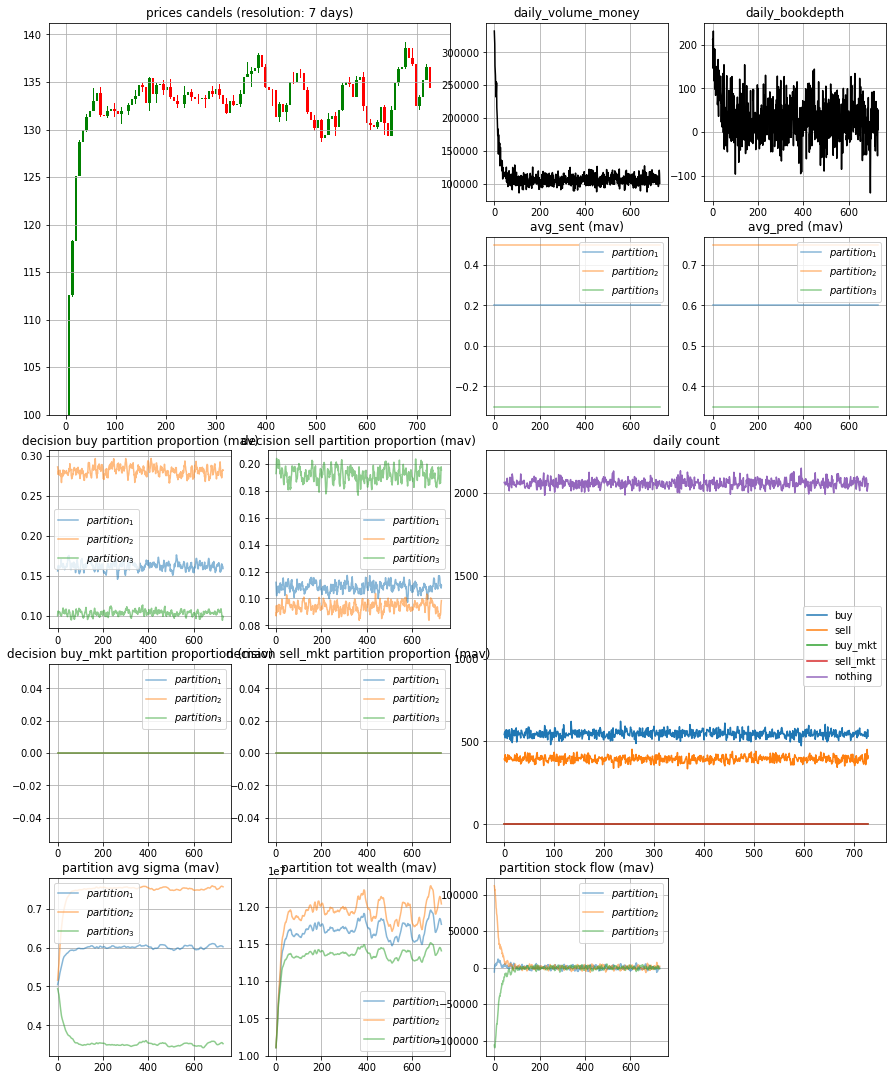

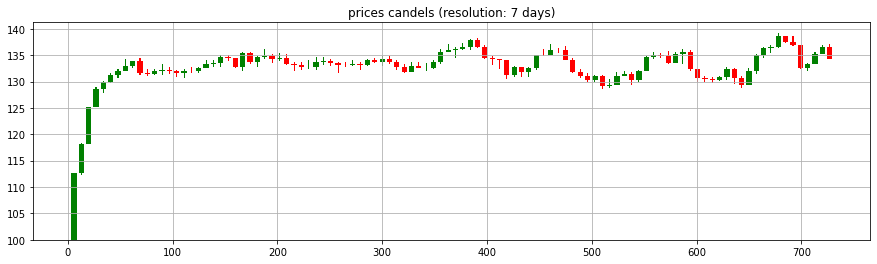

C:\Users\Utente\anaconda3\envs\beam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


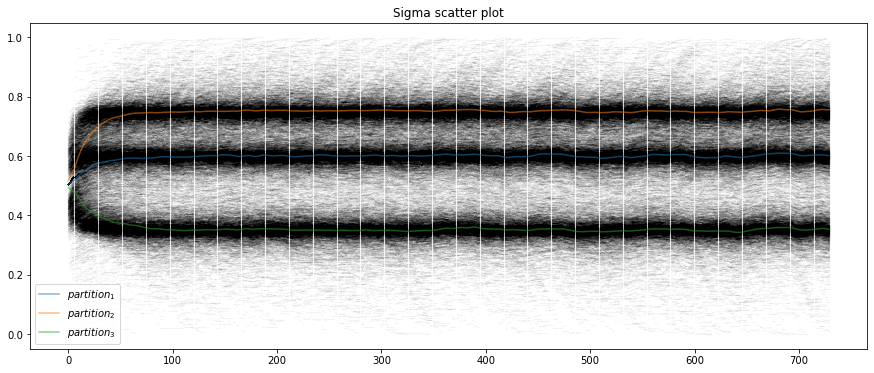

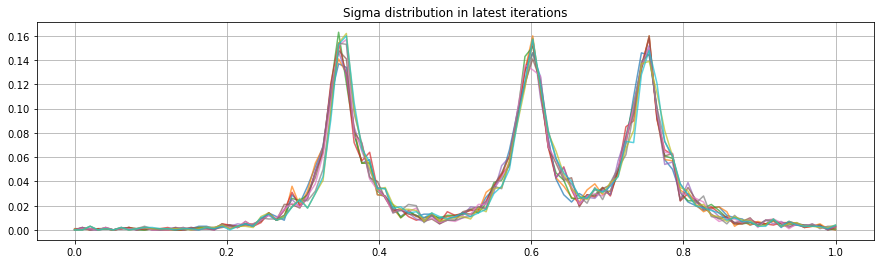

In [10]:
mkt=bm.Market()

SENT_VALUE_1=0.2
mkt.add_partition(1000, '$partition_1$')
mkt.set_part_sentiment('$partition_1$', bm.sentiment_start_at_value(SENT_VALUE_1))

SENT_VALUE_2=0.5
mkt.add_partition(1000, '$partition_2$')
mkt.set_part_sentiment('$partition_2$', bm.sentiment_start_at_value(SENT_VALUE_2))

SENT_VALUE_3=-0.3
mkt.add_partition(1000, '$partition_3$')
mkt.set_part_sentiment('$partition_3$', bm.sentiment_start_at_value(SENT_VALUE_3))

multi_partition_routine(mkt)

__Una partizione (1K) come in sezione 4 ed una che segue il trend (2K)__


Building partition fixsent of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution

Building partition trender of 2000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution


  0%|          | 0/730 [00:00<?, ?it/s]

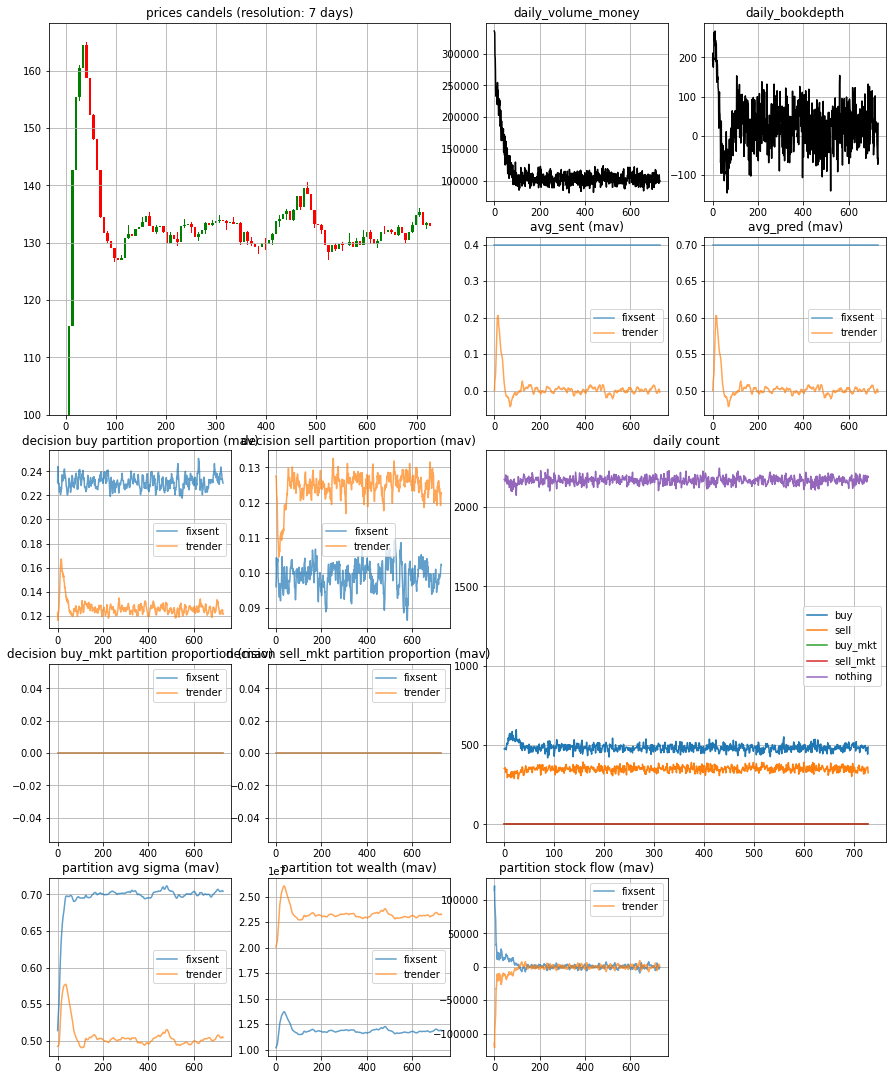

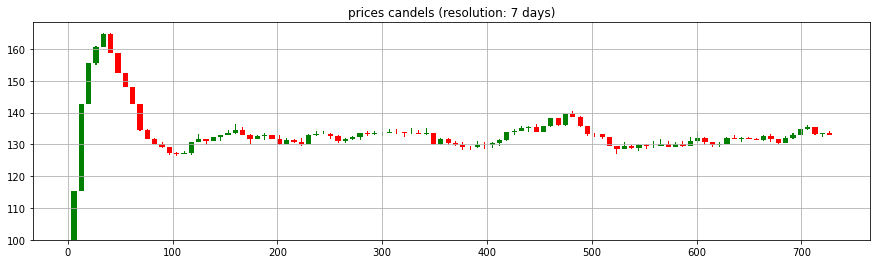

C:\Users\Utente\anaconda3\envs\beam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


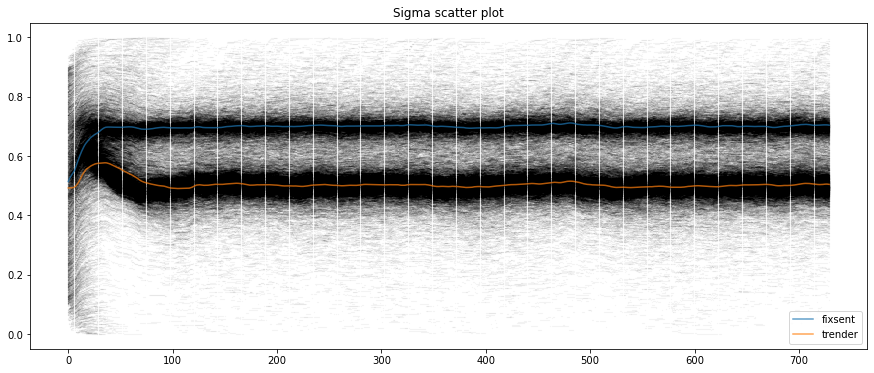

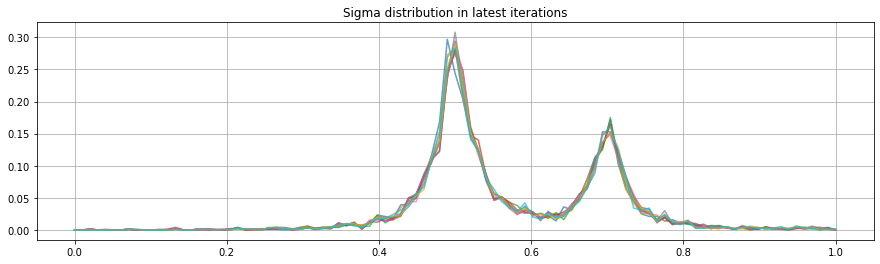

In [11]:
mkt=bm.Market()

SENT_VALUE=0.4
mkt.add_partition(1000, 'fixsent', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment('fixsent', bm.sentiment_start_at_value(SENT_VALUE))

#there is a parameter to set trender susceptibility
mkt.add_partition(2000, 'trender', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment_bytrend('trender', 'MB')

multi_partition_routine(mkt)

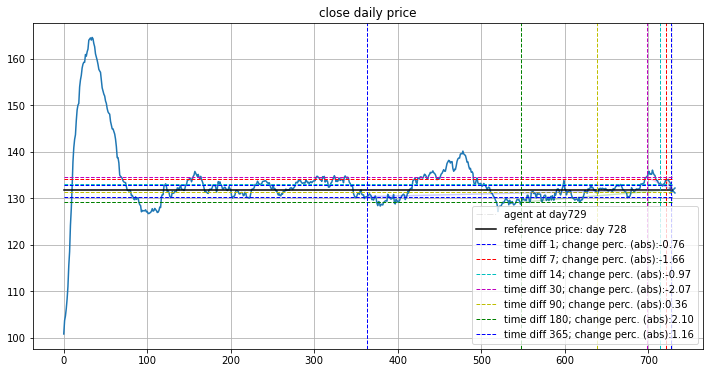

Agent at day  -1 reference price at day -2

with change2sentiment scale: 1% change---> 0.020 sentiment; normalization tanh

  delta   1: perc. diff.:  -0.758;  associated_sentiment -0.00310 with weight 1.00000 value is  -0.00310
  delta   7: perc. diff.:  -1.659;  associated_sentiment -0.03380 with weight 0.14286 value is  -0.00483
  delta  14: perc. diff.:  -0.970;  associated_sentiment -0.02100 with weight 0.07143 value is  -0.00150
  delta  30: perc. diff.:  -2.067;  associated_sentiment -0.04750 with weight 0.03333 value is  -0.00158
  delta  90: perc. diff.:   0.359;  associated_sentiment  0.00906 with weight 0.01111 value is   0.00010
  delta 180: perc. diff.:   2.099;  associated_sentiment  0.03094 with weight 0.00556 value is   0.00017
  delta 365: perc. diff.:   1.160;  associated_sentiment  0.01804 with weight 0.00274 value is   0.00005

trend (multi basic) sentiment for this chart:  -0.010689
checking with manual computation: -0.010689103863275519


In [12]:
mkt.display_trend()

__Una partizione (1K) come in sezione 4 ed una che segue il principio di "ritorno alla media" (2K)__


Building partition fixsent of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution

Building partition mavver of 2000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution


  0%|          | 0/730 [00:00<?, ?it/s]

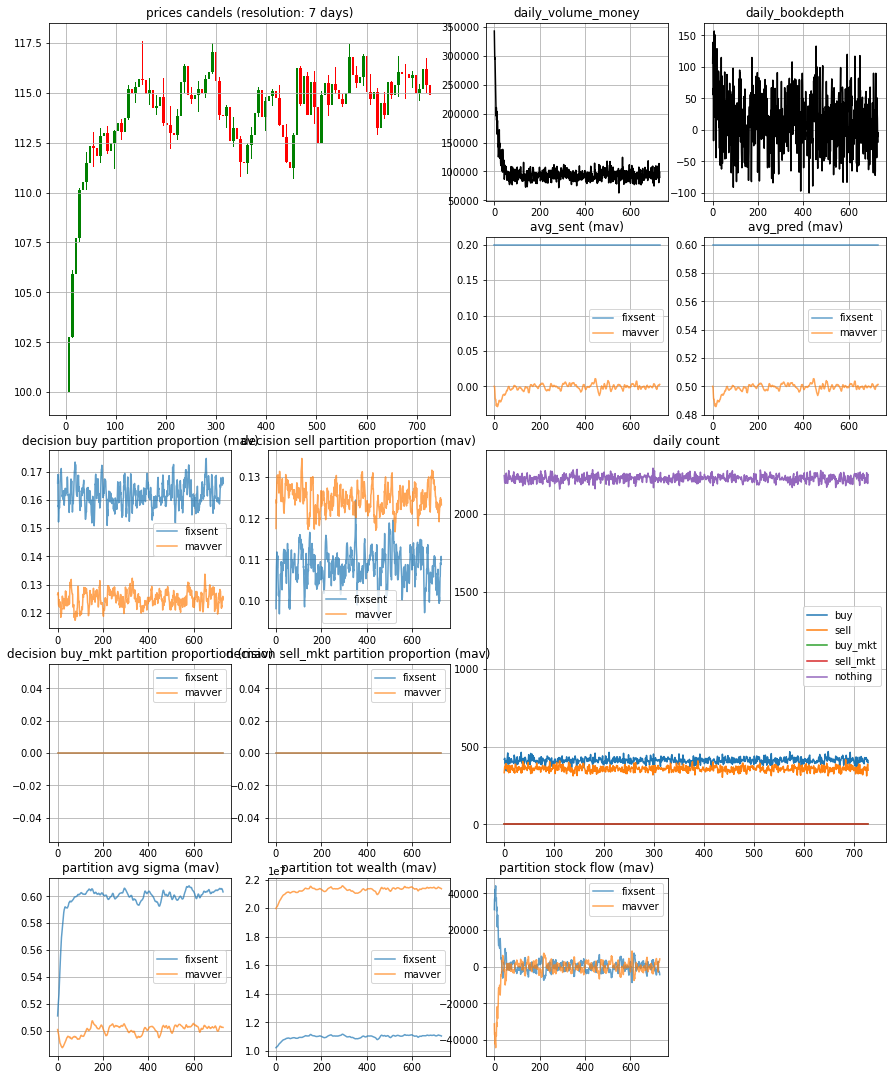

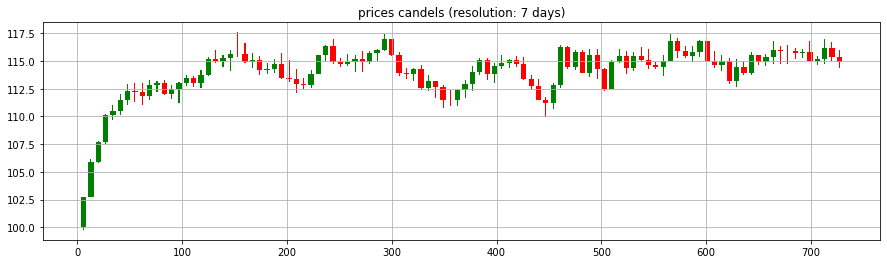

C:\Users\Utente\anaconda3\envs\beam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


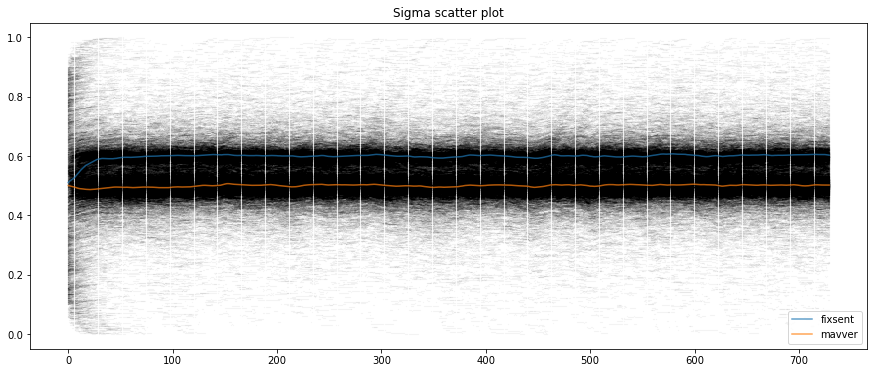

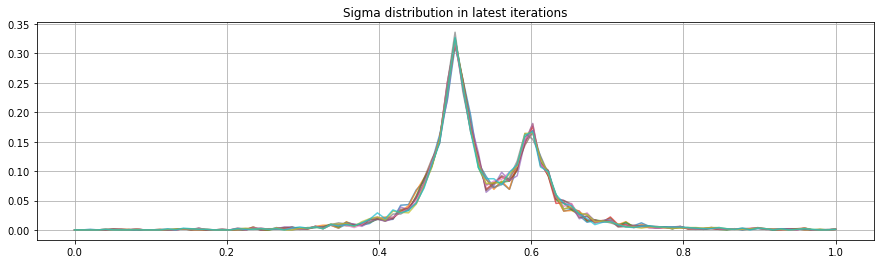

In [13]:
mkt=bm.Market()

SENT_VALUE=0.2
mkt.add_partition(1000, 'fixsent', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment('fixsent', bm.sentiment_start_at_value(SENT_VALUE))

mkt.add_partition(2000, 'mavver', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment_bymavdiff('mavver', 'MB')

multi_partition_routine(mkt)

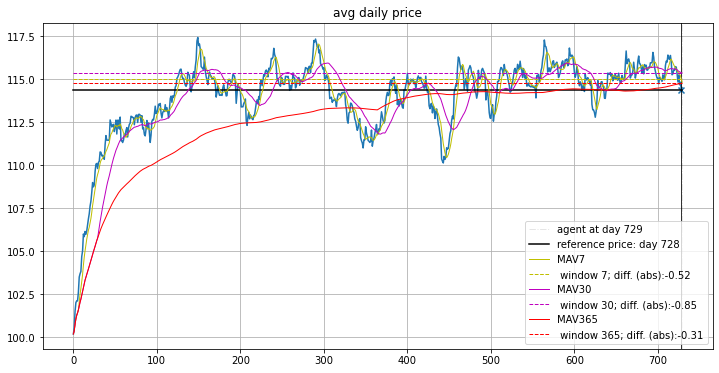

Agent at day  -1 reference price at day -2

with mavdiff2sentiment scale: 1% diff---> -0.050 sentiment; normalization tanh

  window   7: perc. diff.:  -0.522;  associated_sentiment  0.02609 with weight 0.14286 value is   0.00373
  window  30: perc. diff.:  -0.854;  associated_sentiment  0.04268 with weight 0.03333 value is   0.00142
  window 365: perc. diff.:  -0.306;  associated_sentiment  0.01532 with weight 0.00274 value is   0.00004

mavdiff (multi_basic) sentiment for this chart:  0.0051917
checking with manual computation: 0.005191670391524765


In [14]:
mkt.display_mavdiff()

__Sistema molto eterogeneo__


Building partition fixsent of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution

Building partition fs_3 of 1000 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5

Building partition trender of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution

Building partition mavver of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution

Building partition seasonal of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution


  0%|          | 0/730 [00:00<?, ?it/s]

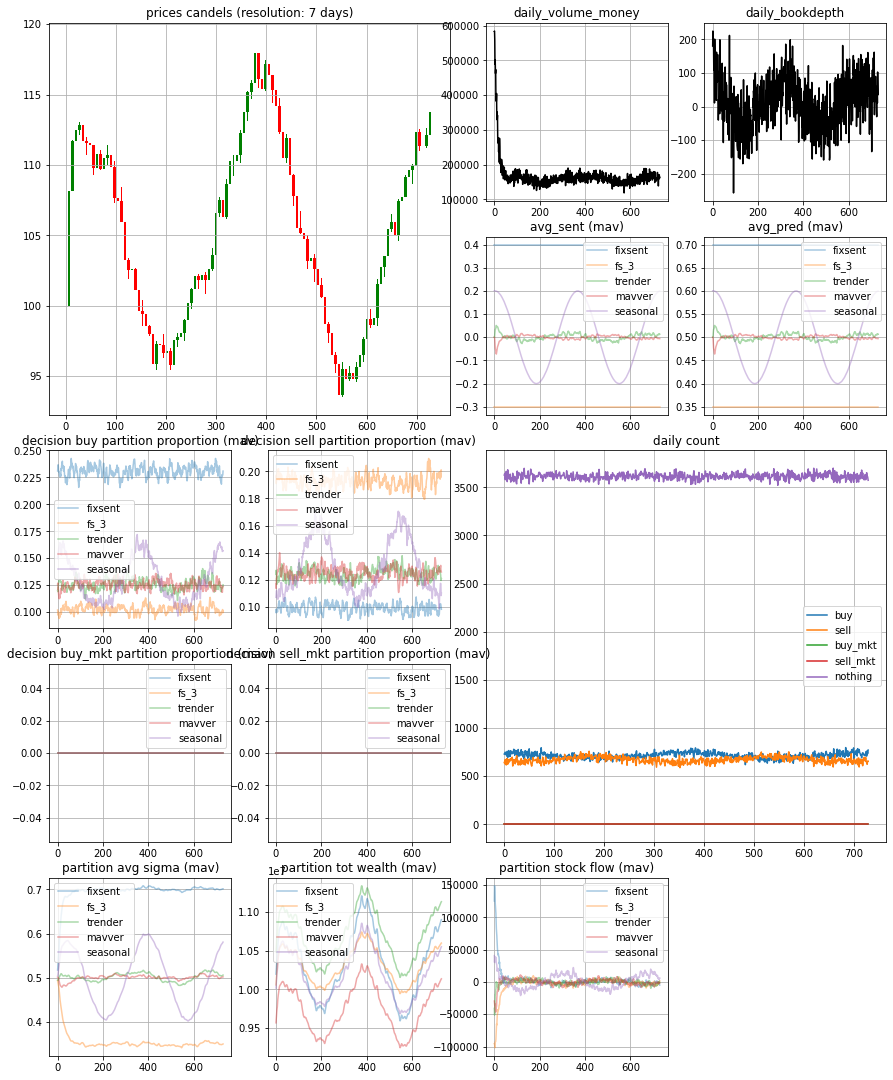

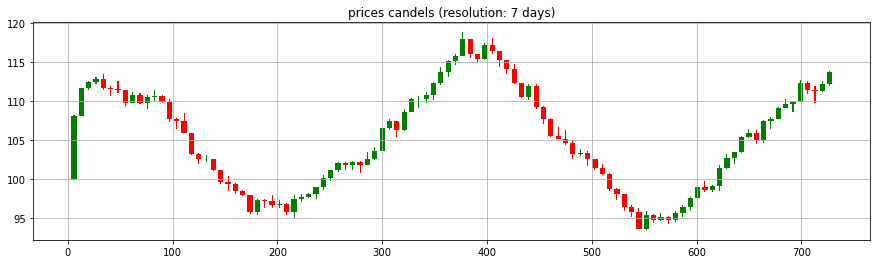

C:\Users\Utente\anaconda3\envs\beam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


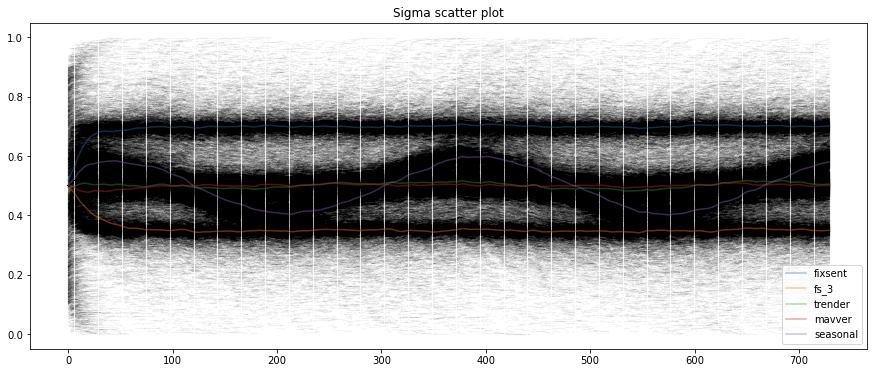

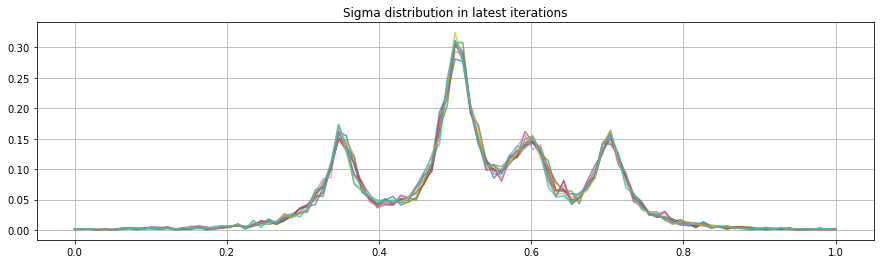

In [18]:
mkt=bm.Market()

SENT_VALUE=0.4
mkt.add_partition(1000, 'fixsent', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment('fixsent', bm.sentiment_start_at_value(SENT_VALUE))

SENT_VALUE_3=-0.3
mkt.add_partition(1000, 'fs_3')
mkt.set_part_sentiment('fs_3', bm.sentiment_start_at_value(SENT_VALUE_3))

mkt.add_partition(1000, 'trender', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment_bytrend('trender', 'MB')

# mkt.add_partition(1000, 'sensitive trender', sigma_prop='uniform', tot_wealth='uniform')
# mkt.set_part_sentiment_bytrend('trender', 'MB', oneperc_sent=0.125) #default is oneperc_sent=0.05

mkt.add_partition(1000, 'mavver', sigma_prop='uniform', tot_wealth='uniform')
mkt.set_part_sentiment_bymavdiff('mavver', 'MB')

mkt.add_partition(1000, 'seasonal', tot_wealth='uniform', sigma_prop='uniform')
mkt.set_part_sentiment('seasonal', bm.sentiment_periodic(periodic_fn, strenght=0.2, period=365))
mkt.add_part_sentiment('seasonal', bm.sentiment_add_noise(noise_sigma=0.05))

multi_partition_routine(mkt)

__Sentiment influenzato da interazioni su rete sociale random (1/10 dei nodi segue un trend esogeno, il restante segue questi "influencer")__

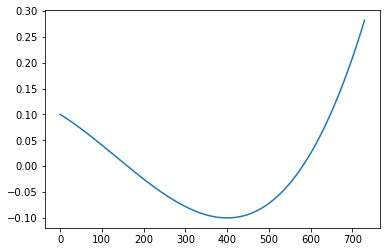


Building partition influencer of 100 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5

Building partition follower of 900 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5


  0%|          | 0/730 [00:00<?, ?it/s]

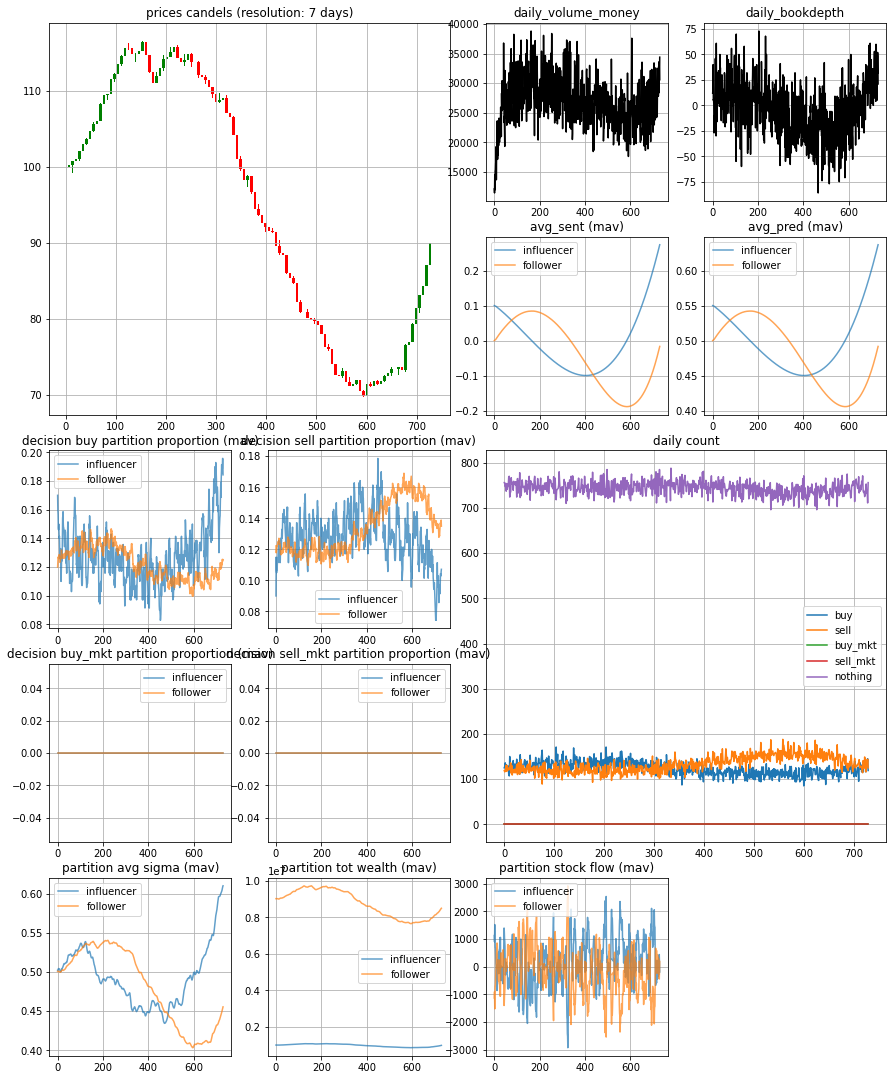

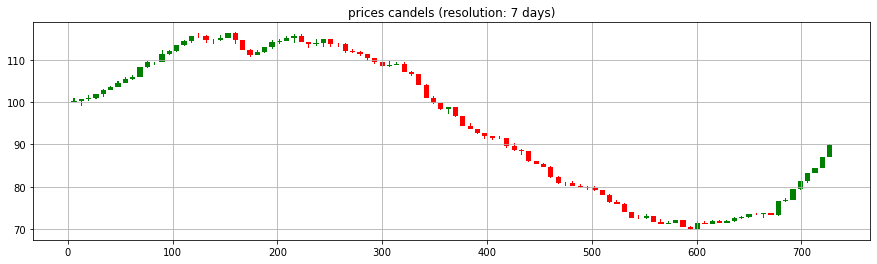

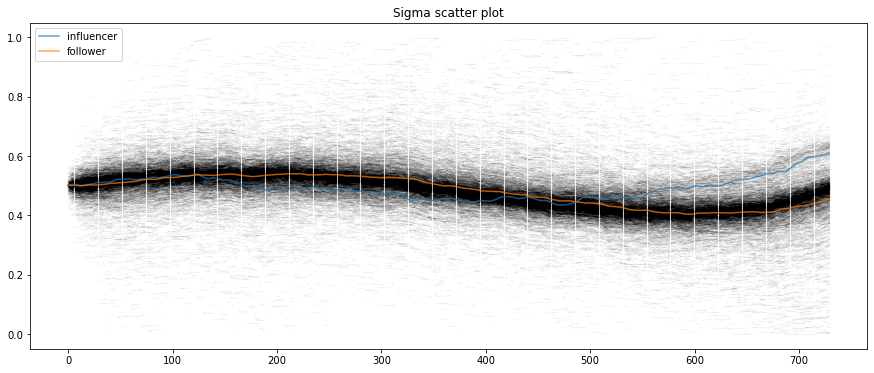

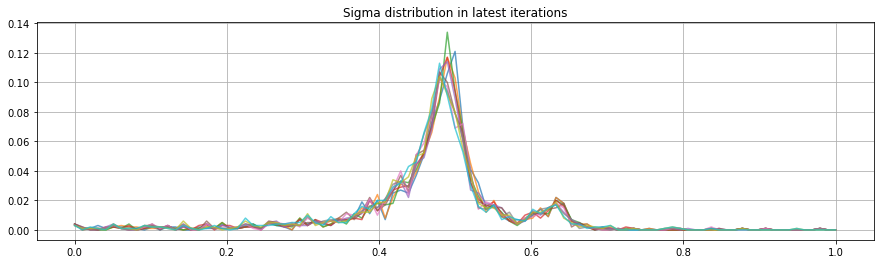

In [14]:
import numpy as np

net_matrix=np.random.binomial(1,0.5, size=(1000, 1000))
net_matrix

# the exogenous trend of influencers (start at 0.1-then down- then up)
x=np.array(list(range(0,365*2)))
x_r=x/400
sentiment_trend=((x_r)**3-x_r**2-x_r)*0.2+0.1

# bm.set_sentiment_bynetwork not properly implemented in 2.9.1
def follower_fn(agent, **external):
    network=external['market'].network
    my_id=agent.id
#     agent.sentiment=0
    for infl in external['market'].get_part_agents('influencer'):
        if network[my_id-1, infl.id-1]>0:
            infl_sent=infl.last_sentiment
            rnd_val=np.random.normal(infl_sent*0.0002, 0.0001)
            agent.sentiment=agent.sentiment+rnd_val

mkt=bm.Market(network=net_matrix)

mkt.add_partition(100, 'influencer')
mkt.set_part_fn('influencer','preliminar', bm.preliminar_value_shifting())
mkt.set_part_sentiment('influencer', bm.sentiment_exogen(sentiment_trend))

mkt.add_partition(900, 'follower')
mkt.set_part_sentiment('follower', follower_fn)

mkt=multi_partition_routine(mkt)

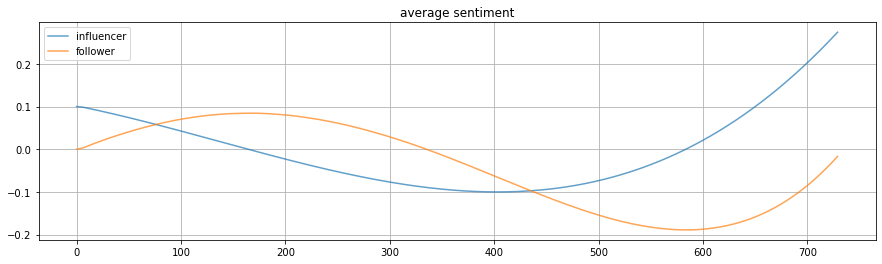

In [18]:
plt.figure(figsize=(15,4))
mkt.plot_partition_metric('avg_sent')
plt.title('average sentiment')
plt.show()